<a href="https://colab.research.google.com/github/BridgetHolt/DS4002/blob/main/SCRIPTS/6_WordCloud_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install wordcloud matplotlib

In [ ]:
#load needed packages
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#load dataset
df=pd.read_csv('/content/combined_clean_data.csv')

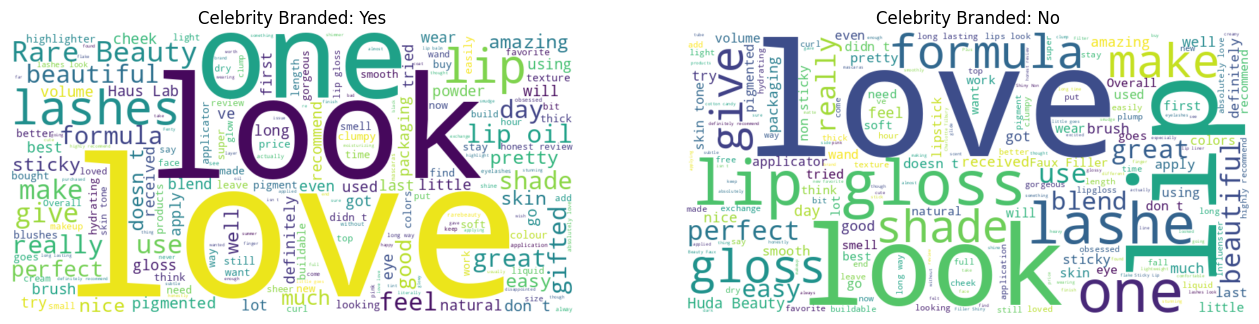

In [ ]:
#Filter DataFrame for CelebrityBranded values
df_yes = df[df['CelebrityBranded'].str.lower() == 'yes']
df_no = df[df['CelebrityBranded'].str.lower() == 'no']

#Combine all review texts into one string for each group
text_yes = " ".join(review for review in df_yes['ReviewText'].dropna())
text_no = " ".join(review for review in df_no['ReviewText'].dropna())

from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["and", "the", "s", "m", "mascara", "color","product","blush"])

#Generate the word clouds with the stopwords removed
wordcloud_yes = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_yes)
wordcloud_no = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_no)

#Plot the word clouds side by side
plt.figure(figsize=(16, 8))

#CelebrityBranded == "yes"
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_yes, interpolation='bilinear')
plt.axis('off')
plt.title("Celebrity Branded: Yes")

#CelebrityBranded == "no"
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_no, interpolation='bilinear')
plt.axis('off')
plt.title("Celebrity Branded: No")

plt.show()


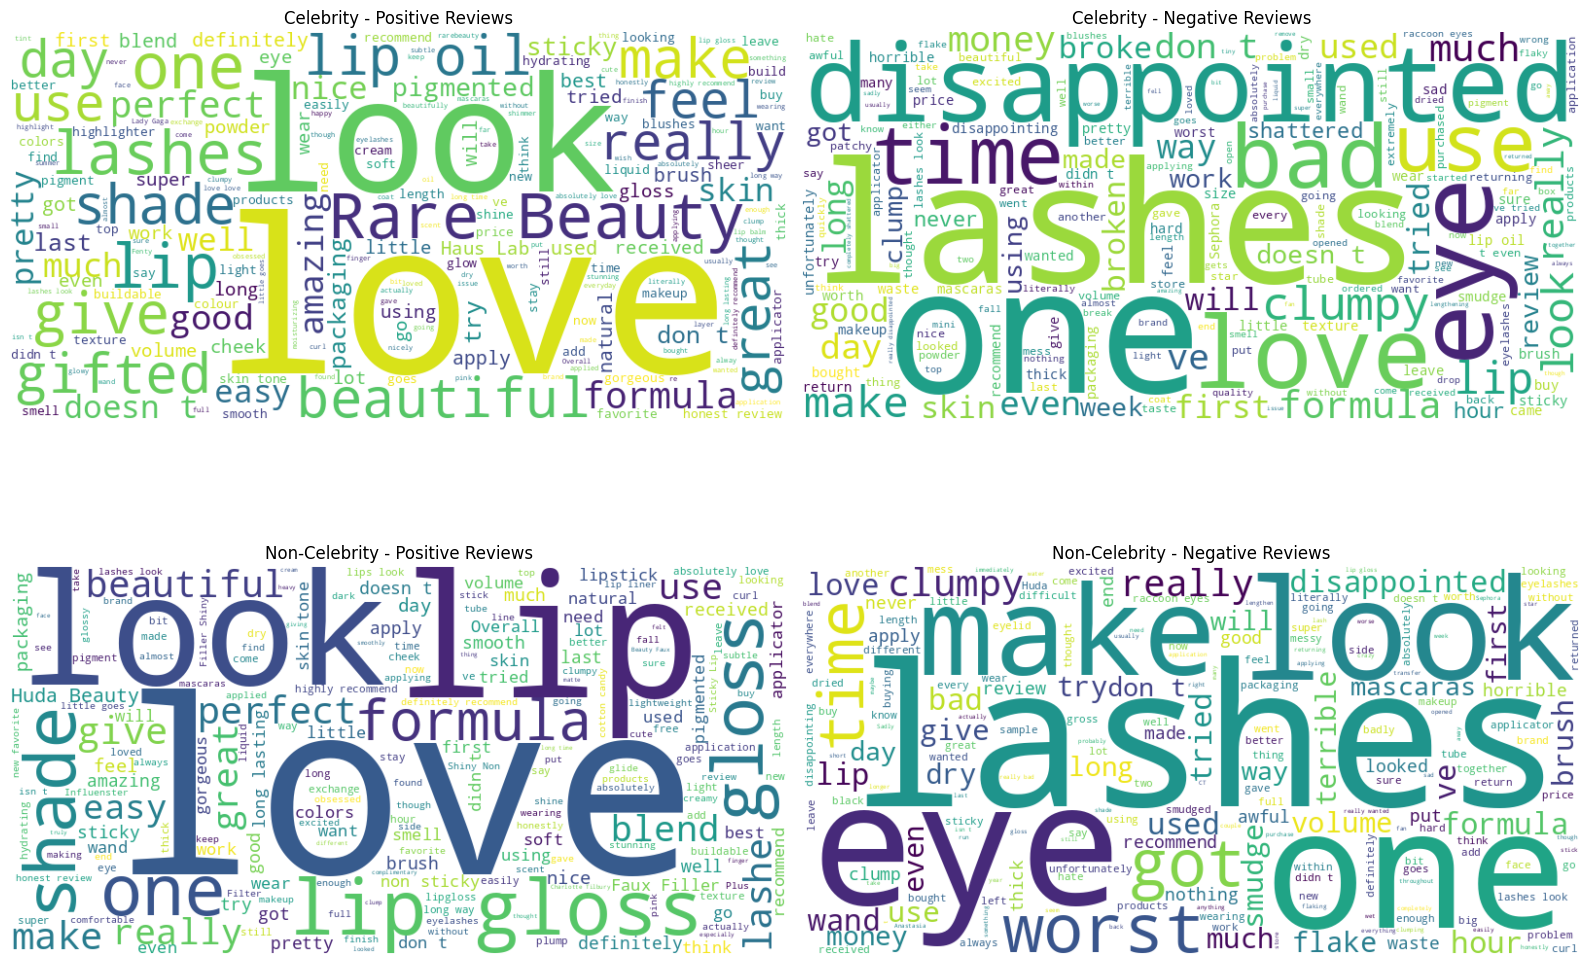

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

df['CelebrityBranded'] = df['CelebrityBranded'].str.lower()
df['Sentiment'] = df['Sentiment'].str.lower()

#Filter data for each group:
df_celebrity_pos = df[(df['CelebrityBranded'] == 'yes') & (df['Sentiment'] == 'positive')]
df_celebrity_neg = df[(df['CelebrityBranded'] == 'yes') & (df['Sentiment'] == 'negative')]
df_noncelebrity_pos = df[(df['CelebrityBranded'] == 'no') & (df['Sentiment'] == 'positive')]
df_noncelebrity_neg = df[(df['CelebrityBranded'] == 'no') & (df['Sentiment'] == 'negative')]

# ombine all review texts into one string for each group
text_celebrity_pos = " ".join(review for review in df_celebrity_pos['ReviewText'].dropna())
text_celebrity_neg = " ".join(review for review in df_celebrity_neg['ReviewText'].dropna())
text_noncelebrity_pos = " ".join(review for review in df_noncelebrity_pos['ReviewText'].dropna())
text_noncelebrity_neg = " ".join(review for review in df_noncelebrity_neg['ReviewText'].dropna())

#Setup stopwords
stopwords = set(STOPWORDS)
stopwords.update(["and", "the", "s", "m", "mascara", "color","product","blush"])

#Creates the word clouds for each group
wordcloud_celebrity_pos = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_celebrity_pos)
wordcloud_celebrity_neg = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_celebrity_neg)
wordcloud_noncelebrity_pos = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_noncelebrity_pos)
wordcloud_noncelebrity_neg = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_noncelebrity_neg)

plt.figure(figsize=(16, 12))

#Celebrity Positive Reviews
plt.subplot(2, 2, 1)
plt.imshow(wordcloud_celebrity_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Celebrity - Positive Reviews")

#Celebrity Negative Reviews
plt.subplot(2, 2, 2)
plt.imshow(wordcloud_celebrity_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Celebrity - Negative Reviews")

#Non-Celebrity Positive Reviews
plt.subplot(2, 2, 3)
plt.imshow(wordcloud_noncelebrity_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Non-Celebrity - Positive Reviews")

#Non-Celebrity Negative Reviews
plt.subplot(2, 2, 4)
plt.imshow(wordcloud_noncelebrity_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Non-Celebrity - Negative Reviews")

plt.tight_layout()
plt.show()




In [ ]:
#Import necessary package for statistical tests
from scipy.stats import ttest_ind

#Split the DataFrame into celebrity and non-celebrity groups
df_yes = df[df['CelebrityBranded'].str.lower() == 'yes']
df_no  = df[df['CelebrityBranded'].str.lower() == 'no']

#List of numeric columns to analyze
numeric_cols = ['PositiveScore', 'NegativeScore', 'CompoundScore', 'NeutralScore']

#Loop over each column and calculate the mean, standard deviation, and perform a t-test
for col in numeric_cols:
    #Calculate means and standard deviations
    mean_yes = df_yes[col].mean()
    std_yes  = df_yes[col].std()
    mean_no  = df_no[col].mean()
    std_no   = df_no[col].std()

    #Perform an independent t-test (using Welch's t-test by setting equal_var=False)
    t_stat, p_val = ttest_ind(df_yes[col].dropna(), df_no[col].dropna(), equal_var=False)

    #Print out the results
    print(f"Results for {col}:")
    print(f"  Celebrity Branded - Mean: {mean_yes:.3f}, Std: {std_yes:.3f}")
    print(f"  Non-Celebrity    - Mean: {mean_no:.3f}, Std: {std_no:.3f}")
    print(f"  t-statistic: {t_stat:.3f}, p-value: {p_val:.3e}\n")


Results for PositiveScore:
  Celebrity Branded - Mean: 0.242, Std: 0.124
  Non-Celebrity    - Mean: 0.244, Std: 0.110
  t-statistic: -1.457, p-value: 1.450e-01

Results for NegativeScore:
  Celebrity Branded - Mean: 0.035, Std: 0.058
  Non-Celebrity    - Mean: 0.027, Std: 0.047
  t-statistic: 12.451, p-value: 1.779e-35

Results for CompoundScore:
  Celebrity Branded - Mean: 0.703, Std: 0.412
  Non-Celebrity    - Mean: 0.784, Std: 0.357
  t-statistic: -17.445, p-value: 9.670e-68

Results for NeutralScore:
  Celebrity Branded - Mean: 0.723, Std: 0.115
  Non-Celebrity    - Mean: 0.729, Std: 0.101
  t-statistic: -4.488, p-value: 7.232e-06



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Ensure no missing values in ReviewText
df = df.dropna(subset=['ReviewText'])

#Split data into celebrity and non-celebrity reviews
celebrity_reviews = df[df['CelebrityBranded'] == 'Yes']['ReviewText']
non_celebrity_reviews = df[df['CelebrityBranded'] == 'No']['ReviewText']

#Combine the reviews
all_reviews = celebrity_reviews.tolist() + non_celebrity_reviews.tolist()
labels = ['celebrity'] * len(celebrity_reviews) + ['non-celebrity'] * len(non_celebrity_reviews)

#TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
tfidf_matrix = vectorizer.fit_transform(all_reviews)
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['label'] = labels

#Calculate average TF-IDF scores per group
celebrity_tfidf = tfidf_df[tfidf_df['label'] == 'celebrity'].drop(columns='label').mean().sort_values(ascending=False)
non_celebrity_tfidf = tfidf_df[tfidf_df['label'] == 'non-celebrity'].drop(columns='label').mean().sort_values(ascending=False)

#Display top words
print("Top words for Celebrity Brands:\n", celebrity_tfidf.head(10))
print("\nTop words for Non-Celebrity Brands:\n", non_celebrity_tfidf.head(10))


Top words for Celebrity Brands:
 love       0.112024
mascara    0.105968
blush      0.105803
product    0.085661
like       0.076239
color      0.073253
lashes     0.070834
lip        0.066688
lips       0.057985
really     0.056510
dtype: float64

Top words for Non-Celebrity Brands:
 love       0.111056
color      0.096234
mascara    0.093029
lips       0.088403
gloss      0.088311
like       0.083379
product    0.082791
lip        0.081893
blush      0.078047
lashes     0.070067
dtype: float64


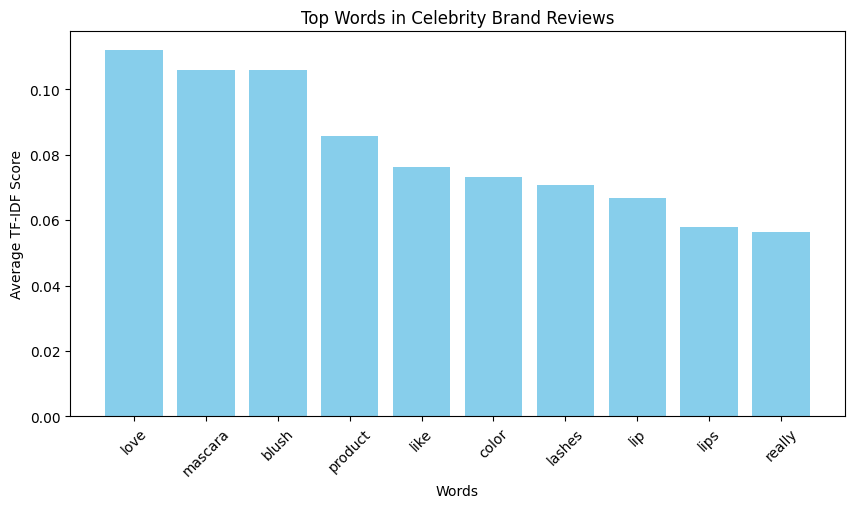

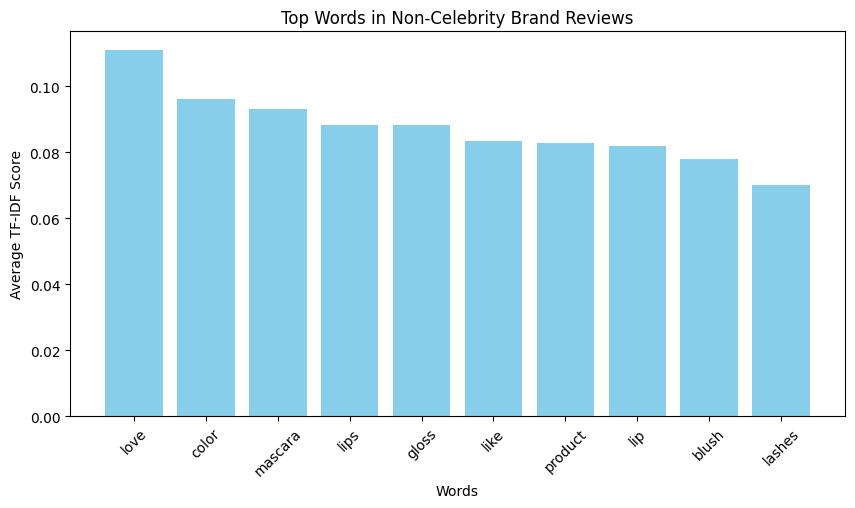

In [ ]:
import matplotlib.pyplot as plt

def plot_top_words(tfidf_scores, title):
    words = tfidf_scores.head(10).index
    scores = tfidf_scores.head(10).values

    plt.figure(figsize=(10, 5))
    plt.bar(words, scores, color='skyblue')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Average TF-IDF Score')
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(celebrity_tfidf, "Top Words in Celebrity Brand Reviews")
plot_top_words(non_celebrity_tfidf, "Top Words in Non-Celebrity Brand Reviews")


## TD-IDF Unique

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

#TF-IDF Vectorization with custom stopwords
#vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=50)
vectorizer = TfidfVectorizer(max_features=50)
tfidf_matrix = vectorizer.fit_transform(all_reviews)
feature_names = vectorizer.get_feature_names_out()

#Convert to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['label'] = labels

#Calculate average TF-IDF scores per group
celebrity_tfidf = tfidf_df[tfidf_df['label'] == 'celebrity'].drop(columns='label').mean().sort_values(ascending=False)
non_celebrity_tfidf = tfidf_df[tfidf_df['label'] == 'non-celebrity'].drop(columns='label').mean().sort_values(ascending=False)

#Compare unique words between the two categories
tfidf_diff = celebrity_tfidf - non_celebrity_tfidf
unique_to_celebrity = tfidf_diff[tfidf_diff > 0].sort_values(ascending=False)
unique_to_non_celebrity = tfidf_diff[tfidf_diff < 0].sort_values()

#Display top unique words
print("Words more common in Celebrity Brand Reviews:\n", unique_to_celebrity.head(20))
print("\nWords more common in Non-Celebrity Brand Reviews:\n", unique_to_non_celebrity.head(20))


Words more common in Celebrity Brand Reviews:
 blush      0.017198
mascara    0.013002
but        0.011030
beauty     0.010800
just       0.006418
have       0.005788
was        0.005408
so         0.005135
be         0.004064
me         0.003422
this       0.002713
very       0.002677
lashes     0.002492
not        0.001744
product    0.001229
more       0.001049
skin       0.000790
you        0.000088
one        0.000044
dtype: float64

Words more common in Non-Celebrity Brand Reviews:
 gloss     -0.051921
the       -0.036064
lips      -0.023395
is        -0.019314
color     -0.018981
shade     -0.018711
sticky    -0.016142
lip       -0.014134
look      -0.009918
formula   -0.009917
that      -0.009682
really    -0.009556
and       -0.009222
for       -0.009175
to        -0.009108
perfect   -0.007319
on        -0.006828
in        -0.006164
like      -0.005853
out       -0.005700
dtype: float64


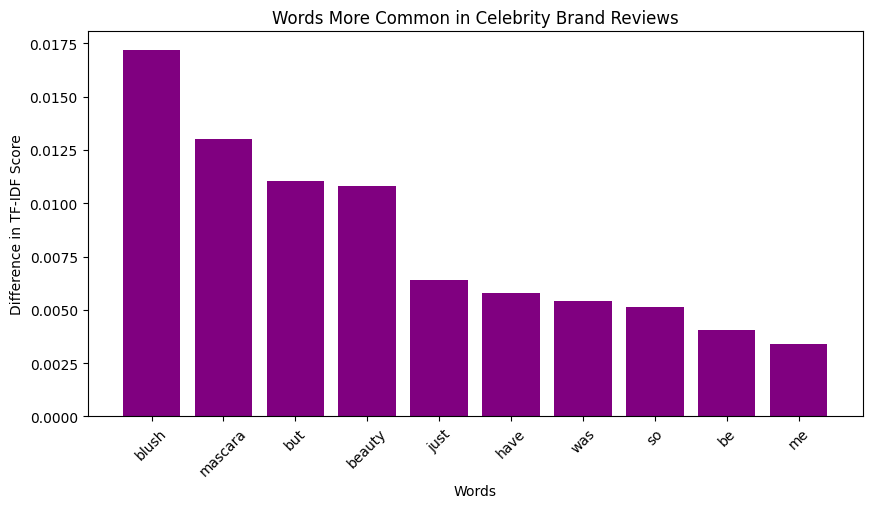

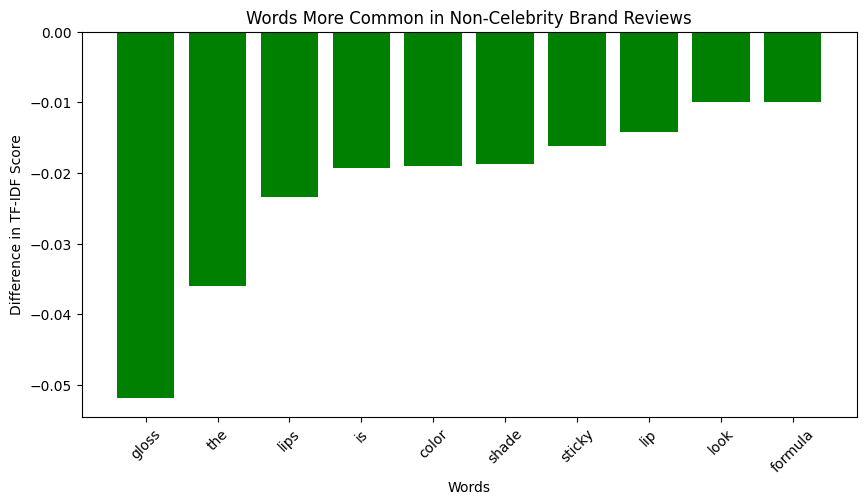

In [ ]:
def plot_unique_words(unique_words, title, color):
    words = unique_words.index
    scores = unique_words.values

    plt.figure(figsize=(10, 5))
    plt.bar(words, scores, color=color)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Difference in TF-IDF Score')
    plt.xticks(rotation=45)
    plt.show()

#Plot unique words for Celebrity and Non-Celebrity brands
plot_unique_words(unique_to_celebrity.head(10), "Words More Common in Celebrity Brand Reviews", 'purple')
plot_unique_words(unique_to_non_celebrity.head(10), "Words More Common in Non-Celebrity Brand Reviews", 'green')
